## Data Preprocessing

tokenization

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "Natural language processing is fascinating. It enables computers to understand human language."
word_tokens = word_tokenize(text)
sentence_tokens = sent_tokenize(text)

print("Word Tokens:", word_tokens)
print("Sentence Tokens:", sentence_tokens)

Word Tokens: ['Natural', 'language', 'processing', 'is', 'fascinating', '.', 'It', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']
Sentence Tokens: ['Natural language processing is fascinating.', 'It enables computers to understand human language.']


In [ ]:
text = "Natural language processing is fascinating`. It enables computers @ to understand $ human language."
text_lowercase = text.lower()
text_lowercase

'natural language processing is fascinating`. it enables computers @ to understand $ human language.'

punctuation and removing characters

In [1]:
import pandas as pd
import string
print(string.punctuation)
clean_text = ''.join(char for char in text_lowercase if char not in string.punctuation)
clean_text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'natural language processing is fascinating it enables computers  to understand  human language'

In [ ]:
import re
clean_text = re.sub('[^a-zA-Z0-9]', ' ', clean_text)
clean_text = re.sub(r'\s+', ' ', clean_text)
clean_text

'natural language processing is fascinating it enables computers to understand human language'

removing stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('stopwords') # download stopwords


words = word_tokenize(clean_text) #tokenize
stop_words = set(stopwords.words('english')) #load 'stopwords' in English lang
filteredwords = [word for word in words if word.lower() not in stop_words]

print(filteredwords)

['natural', 'language', 'processing', 'fascinating', 'enables', 'computers', 'understand', 'human', 'language']


stemming

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
porter = PorterStemmer()
porter.stem('fighting')

'fight'

lemmatization

In [ ]:
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem.lemmatize('fighting')

'fighting'

In [ ]:
lem.lemmatize('stripes', 'v')

'strip'

In [ ]:
lem.lemmatize('stripes', 'n')

'stripe'

In [ ]:
## comparison between stemming and lemmatization
lem_text = " ".join(lem.lemmatize(word) for word in word_tokens)
stem_text = " ".join(porter.stem(word) for word in word_tokens)
print(f"text after lemmatization:- {lem_text}")
print(f"text after stemming:- {stem_text}")


text after lemmatization:- Natural language processing is fascinating . It enables computer to understand human language .
text after stemming:- natur languag process is fascin . it enabl comput to understand human languag .


Spellchecker

In [ ]:
# ! pip install pyspellchecker
from spellchecker import SpellChecker

sc = SpellChecker()
misspelledText = "I hav been rying to wok wih thi modelu" #I have been trying to work with this module

words = misspelledText.split()

correctedList = [sc.correction(word) for word in words]

correctedText = ' '.join(correctedList)

print("List of corrected words:",correctedList)
print("Original Text:", misspelledText)
print("Corrected Text:", correctedText)

List of corrected words: ['I', 'have', 'been', 'trying', 'to', 'wok', 'with', 'the', 'model']
Original Text: I hav been rying to wok wih thi modelu
Corrected Text: I have been trying to wok with the model


Complete preprocessing pipleine using nltk

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

sample_text = "Barack Obama, the 44th President of the United States, gave a speech in Berlin on July 4, 2009, at the Brandenburg Gate. He spoke about the relationship between the United States and Europe, emphasizing the importance of international cooperation. The event was covered by major news outlets, including BBC, CNN, and The New York Times!"


# Convert to lowercase
sample_text = sample_text.lower()

# Remove punctuation
sample_text = re.sub(f"[{string.punctuation}]", "", sample_text)

# Tokenize words
tokens = word_tokenize(sample_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Stemming & Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['barack', 'obama', '44th', 'presid', 'unit', 'state', 'gave', 'speech', 'berlin', 'juli', '4', '2009', 'brandenburg', 'gate', 'spoke', 'relationship', 'unit', 'state', 'europ', 'emphas', 'import', 'intern', 'cooper', 'event', 'cover', 'major', 'news', 'outlet', 'includ', 'bbc', 'cnn', 'new', 'york', 'time']
Lemmatized Words: ['barack', 'obama', '44th', 'president', 'united', 'state', 'gave', 'speech', 'berlin', 'july', '4', '2009', 'brandenburg', 'gate', 'spoke', 'relationship', 'united', 'state', 'europe', 'emphasizing', 'importance', 'international', 'cooperation', 'event', 'covered', 'major', 'news', 'outlet', 'including', 'bbc', 'cnn', 'new', 'york', 'time']


# feature extraction

POS tagging

In [ ]:
#pre-requisite
#nltk.download('averaged_perceptron_tagger')

import nltk
from nltk import pos_tag
pos_tag(lemmatized_words)
# pos_tag(['countries'])

[('barack', 'NN'),
 ('obama', 'VBZ'),
 ('44th', 'CD'),
 ('president', 'NN'),
 ('united', 'JJ'),
 ('state', 'NN'),
 ('gave', 'VBD'),
 ('speech', 'NN'),
 ('berlin', 'NN'),
 ('july', 'RB'),
 ('4', 'CD'),
 ('2009', 'CD'),
 ('brandenburg', 'NN'),
 ('gate', 'NN'),
 ('spoke', 'VBD'),
 ('relationship', 'NN'),
 ('united', 'JJ'),
 ('state', 'NN'),
 ('europe', 'NN'),
 ('emphasizing', 'VBG'),
 ('importance', 'NN'),
 ('international', 'JJ'),
 ('cooperation', 'NN'),
 ('event', 'NN'),
 ('covered', 'VBD'),
 ('major', 'JJ'),
 ('news', 'NN'),
 ('outlet', 'NN'),
 ('including', 'VBG'),
 ('bbc', 'NNS'),
 ('cnn', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('time', 'NN')]

named entity recognition

In [ ]:
#pre-requisites
# ! pip install spacy
#run the following script on terminal to download English lang model from spacy
#python -m spacy download en_core_web_sm


import spacy
# Load pre-trained English language model 'en_core_web_sm' from spaCy
nlp = spacy.load('en_core_web_sm')

extract_ner = nlp(sample_text)
for ent in extract_ner.ents:
    print(ent.text, ent.label_)

44th ORDINAL
the united states GPE
berlin GPE
july 4 2009 DATE
the brandenburg gate FAC
the united states GPE
europe LOC
bbc cnn ORG
the new york times ORG


bag of words sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# bag of words implementation expects an input as a list insead of string. So we'll use our example text in list form
# textForBow = ["Natural language processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. The goal is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful. Applications of NLP include machine translation, sentiment analysis, and chatbots."]
textForBow = [sample_text]
vectorizer = CountVectorizer()
textVectors = vectorizer.fit_transform(textForBow)
bagOfWords = textVectors.toarray() # array- bag of words


vocab= vectorizer.get_feature_names_out() ## fetch the vocabulary

print("Vocabulary:", vocab)
print("Bag of Words Model:")
print(bagOfWords)

Vocabulary: ['2009' '44th' 'about' 'and' 'at' 'barack' 'bbc' 'berlin' 'between'
 'brandenburg' 'by' 'cnn' 'cooperation' 'covered' 'emphasizing' 'europe'
 'event' 'gate' 'gave' 'he' 'importance' 'in' 'including' 'international'
 'july' 'major' 'new' 'news' 'obama' 'of' 'on' 'outlets' 'president'
 'relationship' 'speech' 'spoke' 'states' 'the' 'times' 'united' 'was'
 'york']
Bag of Words Model:
[[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  2 8 1 2 1 1]]


# Word Embeddings using gensim

In [ ]:
import gensim.downloader as api
import numpy as np
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# Load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Function to get word embedding
def getWordEmbeddings(word, model):
    try:
        return model[word]
    except KeyError:
        return None


# calculate cosine similarity between words
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

word1 = "Obama"
word2 = "United"

embedding1 = getWordEmbeddings(word1, model)
embedding2 = getWordEmbeddings(word2, model)

if embedding1 is not None and embedding2 is not None:
    similarity = cosine_similarity(embedding1, embedding2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")
else:
    print("Word(s) not found in pre-trained model.")


Cosine similarity between 'Obama' and 'United': 0.1680458039045334


# Next Word Prediction - Using a Small Text Corpus

In [ ]:
pip install tensorflow numpy

# Importing Required Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import requests

# Tokenizing and Generating Sequences

In [ ]:

corpus = """
The quick brown fox jumps over the lazy dog.
The dog sleeps peacefully while the fox runs fast.
"""


tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

print("Word Index:", word_index)
print("Vocabulary Size:", vocab_size)


sequences = []
for line in corpus.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)


max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')


X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

print("Example Input Sequence (X):", X[0])
print("Example Output (y):", y[0])

Word Index: {'the': 1, 'fox': 2, 'dog': 3, 'quick': 4, 'brown': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'sleeps': 9, 'peacefully': 10, 'while': 11, 'runs': 12, 'fast': 13}
Vocabulary Size: 14
Example Input Sequence (X): [0 0 0 0 0 0 0 1]
Example Output (y): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Defining the Model

In [ ]:

model = Sequential([
    Embedding(vocab_size, 50, input_length=max_sequence_len-1),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Training the Model

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0000e+00 - loss: 2.6453
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1740 - loss: 2.6321
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1049 - loss: 2.6208
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1864 - loss: 2.5842
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1250 - loss: 2.5114
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1049 - loss: 2.4938
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2048 - loss: 2.2895
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1756 - loss: 2.2124
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3536 - loss: 1.9241
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1731 - loss: 2.3026
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1864 - loss: 2.0303
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accur

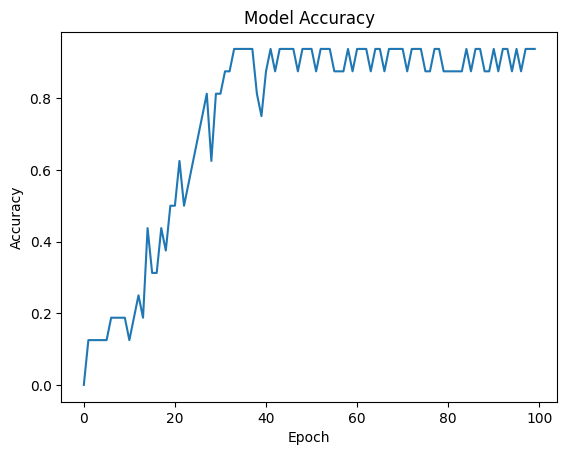

In [ ]:

history = model.fit(X, y, epochs=100, batch_size=1, verbose=1)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Function to predict the next word

In [ ]:

def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None


seed_text = "the quick"
next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
print(f"Seed text: '{seed_text}' → Predicted next word: '{next_word}'")

Seed text: 'the quick' → Predicted next word: 'brown'


# Function to generate a sequence of words

In [ ]:

def generate_sequence(model, tokenizer, max_sequence_len, seed_text, num_words):
    for _ in range(num_words):
        next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
        if next_word is None:
            break
        seed_text += " " + next_word
    return seed_text

seed_text = "the quick"
generated_text = generate_sequence(model, tokenizer, max_sequence_len, seed_text, 3)
print(f"Seed text: '{seed_text}' → Generated text: '{generated_text}'")

Seed text: 'the quick' → Generated text: 'the quick brown fox jumps'



# Fetching a larger dataset (Alice in Wonderland) for Predicting the Next Word

In [ ]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
corpus = response.text

# Triming the header/footer

In [ ]:

start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK"
start_idx = corpus.find(start_marker) + len(start_marker)
end_idx = corpus.find(end_marker)
corpus = corpus[start_idx:end_idx].strip().lower()

# Tokenizing the text

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 3516


# Creating sequences

In [ ]:

sequences = []
for line in corpus.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

# Pading the sequences

In [ ]:
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')
print("Max Sequence Length:", max_sequence_len)

Max Sequence Length: 18




# Spliting into input and output

In [ ]:
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)


# Building the model

In [ ]:
model = Sequential([
    Embedding(vocab_size, 50, input_length=max_sequence_len-1),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

# Compiling the model and training the Model

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0495 - loss: 6.6384
Epoch 2/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0567 - loss: 5.9347
Epoch 3/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0743 - loss: 5.7341
Epoch 4/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0868 - loss: 5.4972
Epoch 5/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0926 - loss: 5.3283
Epoch 6/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1090 - loss: 5.1544
Epoch 7/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1194 - loss: 5.0155
Epoch 8/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1289 - loss: 4.8722
Epoch 9/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1368 - loss: 4.7527
Epoch 10/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1460 - loss: 4.6206
Epoch 11/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1538 - loss: 4.5083
Epoch 12/20
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 

# Plot accuracy

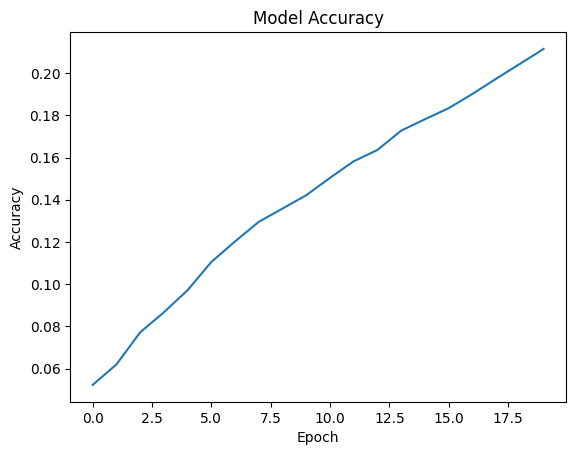

In [ ]:

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# Prediction function

In [ ]:

def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None


# Sequence generation function

In [ ]:
def generate_sequence(model, tokenizer, max_sequence_len, seed_text, num_words):
    for _ in range(num_words):
        next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
        if next_word is None:
            break
        seed_text += " " + next_word
    return seed_text


# Testing the model

In [ ]:

seed_text = "alice was"
next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
print(f"Seed text: '{seed_text}' → Predicted next word: '{next_word}'")
generated_text = generate_sequence(model, tokenizer, max_sequence_len, seed_text, 3)
print(f"Seed text: '{seed_text}' → Generated text: '{generated_text}'")

Seed text: 'alice was' → Predicted next word: 'a'
Seed text: 'alice was' → Generated text: 'alice was a little deal'


# More Examples of the Prediction

In [ ]:

seed_texts = [
    "alice was",
    "the white rabbit",
    "down the",
    "she fell",
    "what a",
    "the mad hatter",
    "into the",
    "very curious",
    "the queen of",
    "it was a",
    "suddenly she",
    "the little door",
    "how very",
    "through the",
    "in a moment"
]

print("Testing Next Word Prediction:")
for seed_text in seed_texts:
    next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
    print(f"Seed text: '{seed_text}' → Predicted next word: '{next_word}'")
    generated_text = generate_sequence(model, tokenizer, max_sequence_len, seed_text, 3)
    print(f"Seed text: '{seed_text}' → Generated text: '{generated_text}'")
    print()

Testing Next Word Prediction:
Seed text: 'alice was' → Predicted next word: 'a'
Seed text: 'alice was' → Generated text: 'alice was a little deal'

Seed text: 'the white rabbit' → Predicted next word: 'blew'
Seed text: 'the white rabbit' → Generated text: 'the white rabbit blew little little'

Seed text: 'down the' → Predicted next word: 'rabbit'
 up'

Seed text: 'she fell' → Predicted next word: 'up'
Seed text: 'she fell' → Generated text: 'she fell up to say'

Seed text: 'what a' → Predicted next word: 'little'
Seed text: 'what a' → Generated text: 'what a little deal to'

Seed text: 'the mad hatter' → Predicted next word: 'deeply'
Seed text: 'the mad hatter' → Generated text: 'the mad hatter deeply and butter'

Seed text: 'into the' → Predicted next word: 'rabbit'
 up'

Seed text: 'very curious' → Predicted next word: 'to'
Seed text: 'very curious' → Generated text: 'very curious to speak on'

Seed text: 'the queen of' → Predicted next word: 'the'
Seed text: 'the queen of' → Generat

# Sentiment Analysis Using the IMDB Dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import re

# Loading the IMDB dataset

In [ ]:

max_words = 10000
max_len = 200


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=max_len, padding='pre')
X_test = pad_sequences(X_test, maxlen=max_len, padding='pre')


# Building the model

In [ ]:

model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiling the model with early stopping

In [ ]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



# Training the model

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.6716 - loss: 0.5652 - val_accuracy: 0.8514 - val_loss: 0.3476
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8869 - loss: 0.2881 - val_accuracy: 0.8626 - val_loss: 0.3216
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9263 - loss: 0.1967 - val_accuracy: 0.8692 - val_loss: 0.3328
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9496 - loss: 0.1400 - val_accuracy: 0.8638 - val_loss: 0.4145
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9701 - loss: 0.0903 - val_accuracy: 0.8576 - val_loss: 0.4426


# Ploting the accuracy and loss

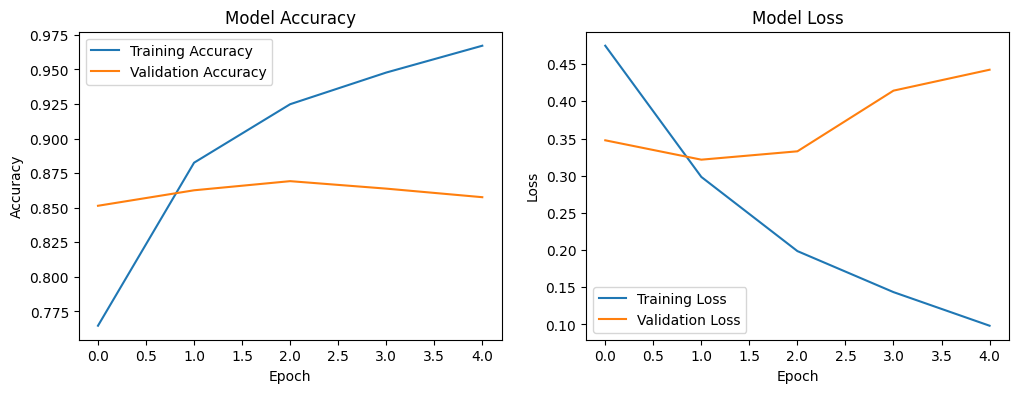

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Evaluating on test set

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8620


# Testing on a few IMDB samples for comparison

In [ ]:

print("\nTesting on IMDB Test Samples:")
for i in range(3):
    pred = model.predict(X_test[i:i+1], verbose=0)[0][0]
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    print(f"Sample {i+1}: True Label: {y_test[i]}, Predicted: {sentiment} (Score: {pred:.4f})")


def preprocess_text(text, word_index, max_words, max_len):

    word_index = {word: idx + 3 for word, idx in word_index.items()}
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNK>"] = 2

    reverse_word_index = {idx: word for word, idx in word_index.items()}


    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = text.split()
    encoded = [min(word_index.get(word, 2), max_words - 1) for word in tokens]
    padded = pad_sequences([encoded], maxlen=max_len, padding='pre')


    decoded = [reverse_word_index.get(idx, "<UNK>") for idx in padded[0][-10:]]
    print(f"Original: '{text}' → Encoded (last 10): {padded[0][-10:]} → Decoded: {decoded}")
    return padded


Testing on IMDB Test Samples:
Sample 1: True Label: 0, Predicted: Negative (Score: 0.2464)
Sample 2: True Label: 1, Predicted: Positive (Score: 0.9922)
Sample 3: True Label: 1, Predicted: Positive (Score: 0.8596)


# Prediction function

In [ ]:

def predict_sentiment(model, text, word_index, max_words, max_len):
    processed_text = preprocess_text(text, word_index, max_words, max_len)
    prediction = model.predict(processed_text, verbose=0)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    return sentiment, prediction



# Testing on custom reviews

In [ ]:

word_index = imdb.get_word_index()
custom_reviews = [
    "This movie was absolutely fantastic and thrilling",
    "Terrible acting and a boring plot",
    "I loved every minute of this film",
    "The worst movie I have ever seen",

    "A breathtaking adventure that kept me hooked",
    "Poorly written and utterly forgettable",
    "The cinematography was gorgeous and the story touching",
    "A total disaster with no redeeming qualities",
    "Such a delightful experience from beginning to end",
    "Confusing plot and terrible performances"
]
print("\nCustom Predictions:")
for review in custom_reviews:
    sentiment, score = predict_sentiment(model, review, word_index, max_words, max_len)
    print(f"Review: '{review}'")
    print(f"Predicted Sentiment: {sentiment} (Score: {score:.4f})\n")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step

Custom Predictions:
Original: 'this movie was absolutely fantastic and thrilling' → Encoded (last 10): [   0    0    0   14   20   16  427  777    5 3017] → Decoded: ['<PAD>', '<PAD>', '<PAD>', 'this', 'movie', 'was', 'absolutely', 'fantastic', 'and', 'thrilling']
Review: 'This movie was absolutely fantastic and thrilling'
Predicted Sentiment: Positive (Score: 0.8113)

Original: 'terrible acting and a boring plot' → Encoded (last 10): [  0   0   0   0 394 116   5   6 357 114] → Decoded: ['<PAD>', '<PAD>', '<PAD>', '<PAD>', 'terrible', 'acting', 'and', 'a', 'boring', 'plot']
Review: 'Terrible acting and a boring plot'
Predicted Sentiment: Negative (Score: 0.1145)

Original: 'i loved every minute of this film' → Encoded (last 10): [  0   0   0  13 447 175 786   7  14  22] → Decoded: ['<PAD>', '<PAD>', '<PAD>', 'i', 'loved', 'every', 'minute', 'of', 'this', 'film']
Review: 'I loved every minute of this film'
Predicted Sentiment: Positive (

# transformers and pre-trained models

In [ ]:
#pip install transformers
from transformers import pipeline

# Load sentiment analysis pipeline
classifier = pipeline('sentiment-analysis',model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')

# Sample data
texts = ["I love this product", "This is terrible", "I am so happy", "I hate this"]

# Get predictions
for text in texts:
    result = classifier(text)
    print(f"Text: {text} => Sentiment: {result[0]['label']}")


Device set to use mps:0


Text: I love this product => Sentiment: POSITIVE
Text: This is terrible => Sentiment: NEGATIVE
Text: I am so happy => Sentiment: POSITIVE
Text: I hate this => Sentiment: NEGATIVE


### T5 (Text-to-Text Transfer Transformer)

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load tokenizer & pre-trained T5 model
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Sample text
text = "Translate English to Spanish: I love this product. I can't believe it is so easy to use it."

# Tokenize input & generate prediction
inputs = tokenizer.encode(text, return_tensors="pt")
outputs = model.generate(inputs, max_length=50)

# Decode & print prediction
translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Translation: {translation}")


Translation: Ich liebe dieses Produkt, das ich nicht glaube, dass es so einfach zu benutzen ist.


**References:**

https://www.geeksforgeeks.org/what-is-sentiment-analysis/

https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

https://www.geeksforgeeks.org/next-word-prediction-with-deep-learning-in-nlp/

https://www.analyticsvidhya.com/blog/2023/07next-word-prediction-with-bidirectional-lstm/

https://www.analyticsvidhya.com/blog/2021/08/predict-the-next-word-of-your-text-using-long-short-term-memory-lstm/

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/

https://github.com/aswintechguy/Data-Science-Concepts/blob/main/NLP/Natural%20Language%20Processing(NLP)%20Concepts%20-%20Hackers%20Realm.ipynb

https://huggingface.co/docs/transformers/en/index

https://huggingface.co/google-t5/t5-small

https://github.com/google-research/text-to-text-transfer-transformer

https://www.geeksforgeeks.org/text-preprocessing-for-nlp-tasks/


